In [1]:
import time
import numpy as np

In [2]:
SEED = 42
np.random.seed(SEED)
vector = np.random.randint(0, 5000, size=6_000_000)

In [3]:
def is_prime(n):
    if n < 2 or n % 2 == 0 and n != 2:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

In [8]:
from concurrent.futures import ProcessPoolExecutor

def get_primes_in_chunk(chunk):
    return [n for n in chunk if is_prime(n)]

def get_primes(vector, num_workers):
    size = len(vector) // num_workers
    chunks = np.array_split(vector, num_workers)

    start_time = time.time()

    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        results = executor.map(get_primes_in_chunk, chunks)

        primes = [prime for chunk in results for prime in chunk]

    end_time = time.time()

    return primes, end_time - start_time

1.1819148063659668
1.1927800178527832


Workers: 1 | Primes: 802855 | Time: 5.7699 seconds
Workers: 2 | Primes: 802855 | Time: 3.0349 seconds
Workers: 4 | Primes: 802855 | Time: 1.5649 seconds
Workers: 8 | Primes: 802855 | Time: 1.2160 seconds
Workers: 16 | Primes: 802855 | Time: 0.9795 seconds
Workers: 32 | Primes: 802855 | Time: 1.0657 seconds
Workers: 64 | Primes: 802855 | Time: 1.1774 seconds
Workers: 128 | Primes: 802855 | Time: 1.4677 seconds


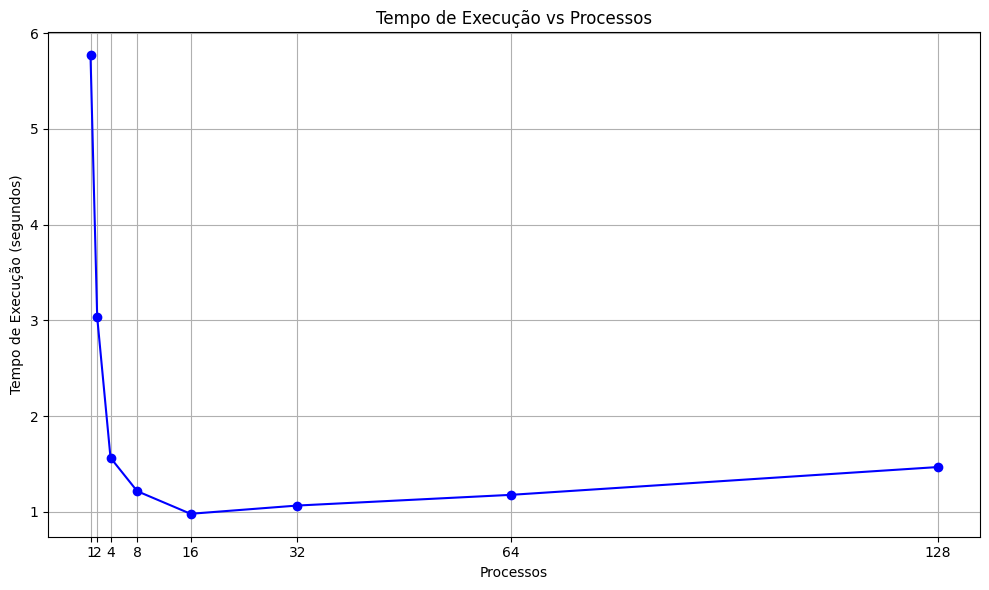

In [18]:
import matplotlib.pyplot as plt

num_workers = [1, 2, 4, 8, 16, 32, 64, 128]
amount_primes = []
exec_times = []

for n in num_workers:
    primes, exec_time = get_primes(vector, n)
    amount_primes.append(len(primes))
    exec_times.append(exec_time)

    print(f"Workers: {n} | Primes: {len(primes)} | Time: {exec_time:.4f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(num_workers, exec_times, marker='o', linestyle='-', color='blue')
plt.title('Tempo de Execução vs Processos')
plt.xlabel('Processos')
plt.ylabel('Tempo de Execução (segundos)')
plt.grid(True)
plt.xticks(num_workers)
plt.tight_layout()
plt.show()